<a href="https://www.kaggle.com/code/kubraterz/car-price-prediction?scriptVersionId=232727663" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### CAR PRICE PREDICTION
#A person wants to buy a car but does not know how much it will cost based on the characteristics of their dream car. In this study, we will evaluate the factors that affect the price of the car, analyze the impact of these factors on the final price, and develop a model to predict the price of the car.

#APPLIED MODELS

#Decision Forests are a family of tree-based models including Random Forests and Gradient Boosted Trees. They are the best place to start when working with tabular data, and will often outperform (or provide a strong baseline) before you begin experimenting with neural networks.*

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices/sample_submission.csv
/kaggle/input/car-prices/train.csv
/kaggle/input/car-prices/test.csv


In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')
#load dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib
import graphviz
import pydotplus
import plotly.graph_objects as go

from scipy import stats
from datetime import date
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


import warnings
warnings.simplefilter(action="ignore")

In [7]:
df_main = pd.read_csv('/kaggle/input/car-prices/sample_submission.csv' and '/kaggle/input/car-prices/test.csv'and '/kaggle/input/car-prices/train.csv')

In [8]:
df_main.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# Adjusting Row Column Settings¶

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
df_main.shape

(188533, 13)

In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [12]:
#numerical stats
df_main.describe()

,id,model_year,milage,price
count,188533.000,188533.000,188533.000,188533.000
mean,94266.000,2015.830,65705.295,43878.016
std,54424.933,5.661,49798.158,78819.522
min,0.000,1974.000,100.000,2000.000
25%,47133.000,2013.000,24115.000,17000.000
50%,94266.000,2017.000,57785.000,30825.000
75%,141399.000,2020.000,95400.000,49900.000
max,188532.000,2024.000,405000.000,2954083.000


In [13]:
#missing values
df_main.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [14]:
print(df_main.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price'], dtype='object')


In [15]:
df_main['Age'] = 2020 - df_main['model_year']
df_main.drop('model_year', axis=1, inplace=True)

In [16]:
df_main.rename(columns = {'price':'Selling_Price(lacs)','Owner':'Past_Owners'},inplace = True)

# Exploratory Data Analysis (EDA)

In [17]:
df_main.columns

Index(['id', 'brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'Selling_Price(lacs)', 'Age'], dtype='object')

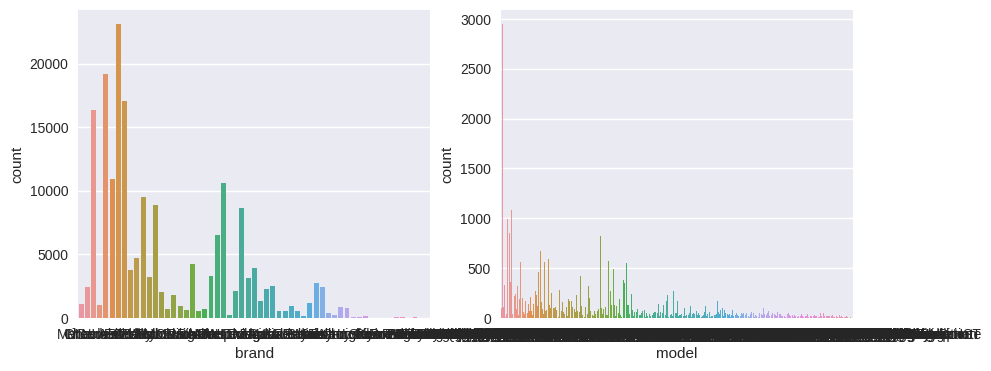

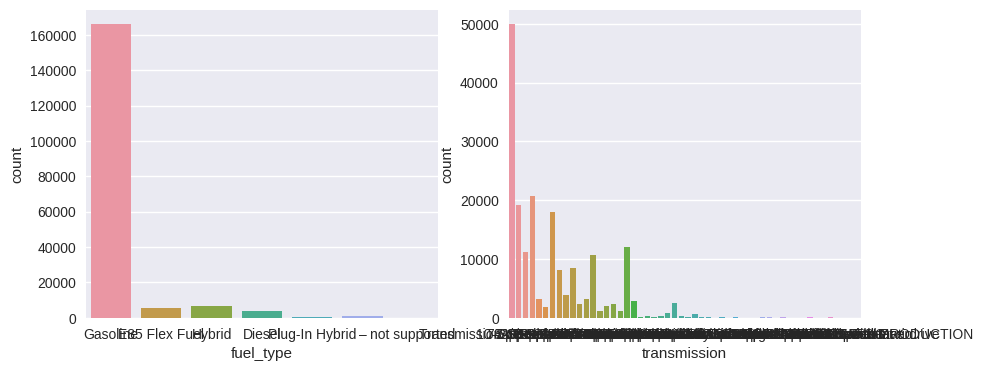

In [18]:
cat_cols = ['brand','model','fuel_type','transmission']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

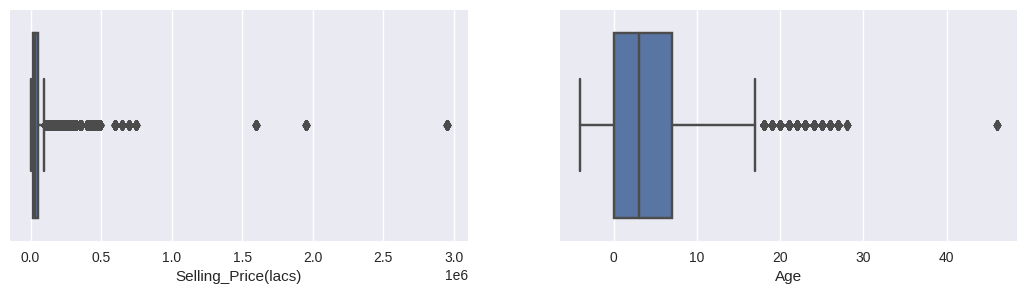

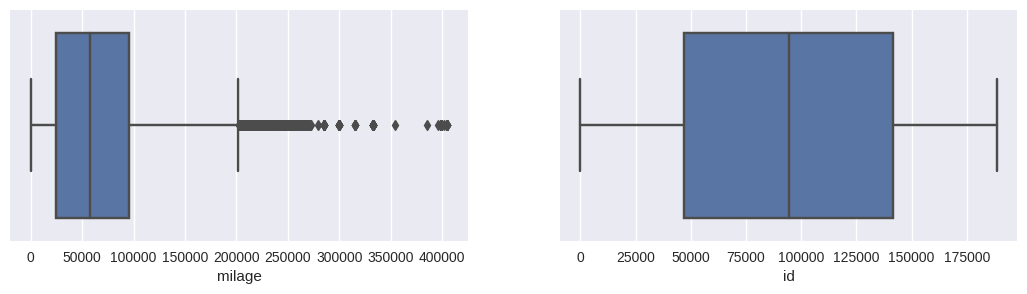

In [19]:
num_cols = ['Selling_Price(lacs)','Age','milage','id']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()


In [20]:
df_main[df_main['Age'] > df_main['Age'].quantile(0.99)].head(5)

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Selling_Price(lacs),Age
456,456,Ford,F-250 XL SuperCab H/D,90400,Gasoline,220.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,A/T,Red,Gray,None reported,Yes,2800,23
461,461,Chevrolet,Suburban 1500 LS,134033,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,29995,22
511,511,Chevrolet,Suburban 1500 LS,119500,Gasoline,300.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Beige,At least 1 accident or damage reported,Yes,13800,21
531,531,Toyota,Land Cruiser Base,150000,Gasoline,212.0HP 4.5L Straight 6 Cylinder Engine Gasoli...,5-Speed A/T,Black,Beige,At least 1 accident or damage reported,Yes,6399,23
913,913,Toyota,Camry LE,134000,Gasoline,133.0HP 2.2L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,At least 1 accident or damage reported,Yes,9500,21


In [21]:
df_main[df_main['Selling_Price(lacs)'] > df_main['Selling_Price(lacs)'].quantile(0.99)].head(5)

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Selling_Price(lacs),Age
220,220,Ford,F-150 XLT,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083,-1
267,267,Aston,Martin Vantage GT Base,127600,Gasoline,430.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,315000,3
283,283,Tesla,Model Y Performance,7578,NaN,Electric,Automatic,White,Black,None reported,NaN,267950,-3
296,296,Mercedes-Benz,S-Class S 550 4MATIC,44300,Gasoline,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,489000,0
350,350,Mercedes-Benz,GLS 550 Base 4MATIC,67482,Gasoline,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,9-Speed A/T,White,Beige,None reported,Yes,349950,2


In [22]:
df_main[df_main['milage'] > df_main['milage'].quantile(0.99)].head(5)

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Selling_Price(lacs),Age
0,0,MINI,Cooper S Base,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,13
10,10,Chevrolet,Camaro 1LT,212500,Gasoline,312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Gray,At least 1 accident or damage reported,Yes,7950,9
28,28,Toyota,Tacoma PreRunner,244200,Gasoline,236.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,–,At least 1 accident or damage reported,Yes,3499,12
195,195,Toyota,Sequoia Limited,269885,Gasoline,381.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,7200,12
424,424,Lexus,GX 470 Base,215000,Gasoline,263.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,At least 1 accident or damage reported,Yes,10499,13


# Bivariate/Multi-Variate Analysis

In [23]:
#numerical stats
df_main.describe()

,id,milage,Selling_Price(lacs),Age
count,188533.000,188533.000,188533.000,188533.000
mean,94266.000,65705.295,43878.016,4.170
std,54424.933,49798.158,78819.522,5.661
min,0.000,100.000,2000.000,-4.000
25%,47133.000,24115.000,17000.000,0.000
50%,94266.000,57785.000,30825.000,3.000
75%,141399.000,95400.000,49900.000,7.000
max,188532.000,405000.000,2954083.000,46.000


In [24]:
# Sadece sayısal sütunları seçelim
df_corr = df_main.select_dtypes(include=['number']).corr()

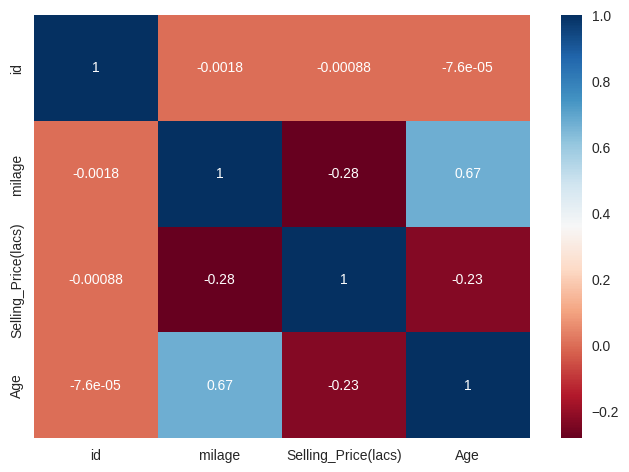

In [25]:
# Isı haritasını çizelim
sns.heatmap(df_corr, annot=True, cmap="RdBu")
plt.show()

In [26]:
# Sadece sayısal sütunları seçelim
df_corr = df_main.select_dtypes(include=['number']).corr()
df_corr['Selling_Price(lacs)']

id                    -0.001
milage                -0.283
Selling_Price(lacs)    1.000
Age                   -0.232
Name: Selling_Price(lacs), dtype: float64

In [27]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'model', columns= 'fuel_type').head(5)

fuel_type,Diesel,E85 Flex Fuel,Gasoline,Hybrid,Plug-In Hybrid,not supported,–
model,,,,,,,
124 Spider Abarth,NaN,19998.000,21481.250,NaN,NaN,NaN,NaN
128 i,NaN,34500.000,13902.050,NaN,NaN,NaN,NaN
135 i,NaN,NaN,18417.738,NaN,NaN,NaN,NaN
135 is,NaN,NaN,22702.214,NaN,NaN,NaN,NaN
1500 Big Horn,70439.000,44015.000,47079.233,54249.537,NaN,NaN,NaN


In [28]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'model', columns= 'clean_title').head(5)

clean_title,Yes
model,
124 Spider Abarth,21481.250
128 i,15133.842
135 i,17234.000
135 is,22064.000
1500 Big Horn,48252.557


# Data Preparation¶

In [29]:
df_main.drop(labels= 'fuel_type',axis= 1, inplace = True)

In [30]:
df_main.head()

,id,brand,model,milage,engine,transmission,ext_col,int_col,accident,clean_title,Selling_Price(lacs),Age
0,0,MINI,Cooper S Base,213000,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,13
1,1,Lincoln,LS V8,143250,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,18
2,2,Chevrolet,Silverado 2500 LT,136731,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,18
3,3,Genesis,G90 5.0 Ultimate,19500,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,3
4,4,Mercedes-Benz,Metris Base,7388,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,-1


In [31]:
df_main = pd.get_dummies(data = df_main,drop_first=True) 

In [ ]:
df_main.head(5)

# Train-Test Split

In [33]:
# Separating target variable and its features
y = df_main['Selling_Price(lacs)']
X = df_main.drop('Selling_Price(lacs)',axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (150826, 3596)
x test:  (37707, 3596)
y train:  (150826,)
y test:  (37707,)


# Model Creation/Evaluation

Applying regression models
* Linear Regression
* Random Forest Regression
* Gradient Boosting regression

In [36]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [37]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

# Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.17
Test R2-score : -538910046.08
Train CV scores : [ 1.04850370e-01  9.21154467e-02  9.14820689e-02 -4.86376039e+09
 -2.21569095e+07]
Train CV mean : -977183459.57


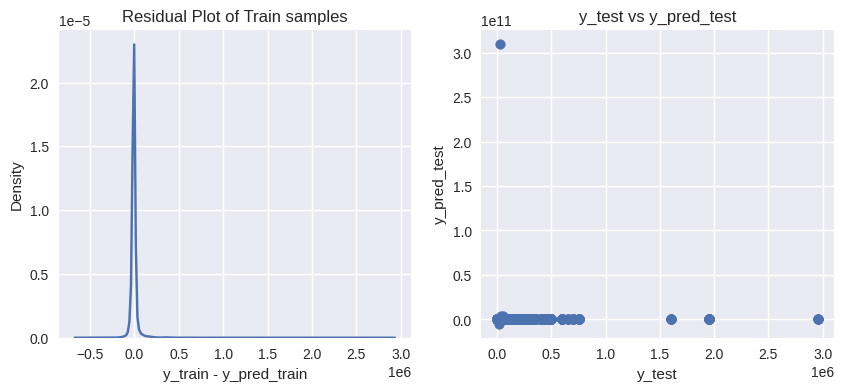

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [39]:
# Separating target variable and its features
y = df_main['Selling_Price(lacs)']
X = df_main.drop('Selling_Price(lacs)',axis=1)

# Random Forest

In [40]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [ ]:
car_pred_model(rf_rs,'random_forest.pkl')

In [ ]:
print(rf_rs.best_estimator_)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [ ]:
car_car_pred_model(gb_rs,"gradient_boosting.pkl")pred_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
Technique = ["LinearRegression","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)